### Genius API

In [1]:
pip install lyricsgenius

Note: you may need to restart the kernel to use updated packages.


### Spotify API

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

# Set up authentication
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="36f9b20ddb00459f8e83e0f12dc6dc69",
                                                           client_secret="643b5d8c69e74370a483c3217a213b61"))

# Set up a dictionary to store the tracks for each genre
genre_tracks = {}

# Loop through the top 10 genres on Spotify
for genre in ['pop', 'hip-hop', 'rock', 'edm', 'rnb', 'latin', 'indie', 'country', 'metal', 'jazz']:
    # Retrieve the top 50 tracks for the genre
    results = sp.search(q='genre:' + genre, type='track', limit=50)
    
    # Create a list to store the results
    tracks = []
    
    # Loop through each track and retrieve its features
    for track in results['tracks']['items']:
        track_name = track['name']
        artist_name = track['artists'][0]['name']

        # Get the audio features for the track
        features = sp.audio_features(track['id'])[0]
        danceability = features['danceability']
        energy = features['energy']   
        valence = features['valence']  
        tempo = features['tempo']
        loudness = features['loudness']

        # Get the genre for the artist
        genres = sp.artist(track['artists'][0]['id'])['genres']

        # Get the popularity of the track and artist
        popularity = track['popularity']
        artist_popularity = sp.artist(track['artists'][0]['id'])['popularity']  
    
        # Add the results to the tracks list
        track_info = {
            'track_name': track_name,
            'artist_name': artist_name,
            'popularity': popularity,
            'artist_popularity': artist_popularity,
            'danceability': danceability,
            'energy': energy,
            'valence': valence,
            'tempo': tempo,
            'loudness': loudness,
            'genres': genres
        }
        tracks.append(track_info)

    # Add the tracks to the genre_tracks dictionary
    genre_tracks[genre] = tracks
    
# Concatenate the dataframes for each genre into a single dataframe
sdf = pd.concat([pd.DataFrame(genre_tracks[genre]) for genre in genre_tracks], ignore_index=True)

# Print the DataFrame
print(sdf)




                  track_name           artist_name  popularity  \
0                    Flowers           Miley Cyrus         100   
1                  Kill Bill                   SZA          93   
2                  Kill Bill                   SZA          92   
3        Die For You - Remix            The Weeknd          93   
4                 Sure Thing                Miguel          90   
..                       ...                   ...         ...   
445          Check the Rhime  A Tribe Called Quest          63   
446         I've Got a Woman           Ray Charles          64   
447               Award Tour  A Tribe Called Quest          62   
448                  Runnin'          The Pharcyde          62   
449  After the Love Has Gone    Earth, Wind & Fire          65   

     artist_popularity  danceability  energy  valence    tempo  loudness  \
0                   93         0.707   0.681    0.646  117.999    -4.325   
1                   95         0.644   0.735    0.418  

In [5]:
sdf.tail()

track_name           artist_name  popularity  \
445          Check the Rhime  A Tribe Called Quest          63   
446         I've Got a Woman           Ray Charles          64   
447               Award Tour  A Tribe Called Quest          62   
448                  Runnin'          The Pharcyde          62   
449  After the Love Has Gone    Earth, Wind & Fire          65   

     artist_popularity  danceability  energy  valence    tempo  loudness  \
445                 70         0.881   0.361    0.799   96.430   -14.728   
446                 70         0.556   0.610    0.665  199.373    -4.729   
447                 70         0.812   0.600    0.555   97.338    -9.414   
448                 62         0.754   0.785    0.821   94.123    -8.178   
449                 75         0.424   0.443    0.391  131.675   -13.450   

                                                genres  
445  [alternative hip hop, conscious hip hop, east ...  
446  [adult standards, classic soul, jazz blues, pi...  
447  [alternative hip hop, conscious hip hop, east ...  
448  [alternative hip hop, hardcore hip hop, hip ho...  
449        [disco, funk, jazz funk, quiet storm, soul]

### Genius.com API

In [6]:
#Conbine title and artist so we can get the value needed for genius.com API
sdf['newname']='('+'"'+sdf['track_name']+'"'+','+'"'+sdf['artist_name']+'"'+")"
newlist=sdf['newname'].tolist()
newlist

['("Flowers","Miley Cyrus")',
 '("Kill Bill","SZA")',
 '("Kill Bill","SZA")',
 '("Die For You - Remix","The Weeknd")',
 '("Sure Thing","Miguel")',
 '("Romantic Homicide","d4vd")',
 '("Rich Flex","Drake")',
 '("Snooze","SZA")',
 '("Anti-Hero","Taylor Swift")',
 '("Low","SZA")',
 '("Here With Me","d4vd")',
 '("ceilings","Lizzy McAlpine")',
 '("Unholy (feat. Kim Petras)","Sam Smith")',
 '("OMG","NewJeans")',
 '("I\'m Good (Blue)","David Guetta")',
 '("Sweater Weather","The Neighbourhood")',
 '("Escapism.","RAYE")',
 '("golden hour","JVKE")',
 '("Calm Down (with Selena Gomez)","Rema")',
 '("Nonsense","Sabrina Carpenter")',
 '("I Ain\'t Worried","OneRepublic")',
 '("As It Was","Harry Styles")',
 '("CUFF IT","Beyoncé")',
 '("Die For You","The Weeknd")',
 '("Die For You","The Weeknd")',
 '("Shakira: Bzrp Music Sessions, Vol. 53","Bizarrap")',
 '("Starboy","The Weeknd")',
 '("Lavender Haze","Taylor Swift")',
 '("Jimmy Cooks (feat. 21 Savage)","Drake")',
 '("Space Song","Beach House")',
 '("Apo

In [7]:
import lyricsgenius
genius = lyricsgenius.Genius('Ys6QlVwf1Vc53fr4DR4AVWXchYVYi3B740Hq1gf1K5eQbrPZRjFdaB9gMPj5Q8i7')
genius.timeout = 300

In [8]:
#list of scraped songs from spotify API
songs = [("Flowers","Miley Cyrus"),
 ("Kill Bill","SZA"),
 ("Kill Bill","SZA"),
 ("Sure Thing","Miguel"),
 ("Romantic Homicide","d4vd"),
 ("Rich Flex","Drake"),
 ("Anti-Hero","Taylor Swift"),
 ("Snooze","SZA"),
 ("Die For You - Remix","The Weeknd"),
 ("Low","SZA"),
 ("Unholy (feat. Kim Petras)","Sam Smith"),
 ("Here With Me","d4vd"),
 ("OMG","NewJeans"),
 ("I\'m Good (Blue)","David Guetta"),
 ("Sweater Weather","The Neighbourhood"),
 ("Escapism.","RAYE"),
 ("golden hour","JVKE"),
 ("ceilings","Lizzy McAlpine"),
 ("Nonsense","Sabrina Carpenter"),
 ("CUFF IT","Beyoncé"),
 ("Die For You","The Weeknd"),
 ("I Ain\'t Worried","OneRepublic"),
 ("As It Was","Harry Styles"),
 ("Shakira: Bzrp Music Sessions, Vol. 53","Bizarrap"),
 ("Calm Down (with Selena Gomez)","Rema"),
 ("Die For You","The Weeknd"),
 ("Love Again","The Kid LAROI"),
 ("Made You Look","Meghan Trainor"),
 ("Lavender Haze","Taylor Swift"),
 ("Jimmy Cooks (feat. 21 Savage)","Drake"),
 ("Starboy","The Weeknd"),
 ("Space Song","Beach House"),
 ("Ditto","NewJeans"),
 ("Apocalypse","Cigarettes After Sex"),
 ("Until I Found You (with Em Beihold) - Em Beihold Version","Stephen Sanchez"),
 ("Late Night Talking","Harry Styles"),
 ("La Bachata","Manuel Turizo"),
 ("Shirt","SZA"),
 ("The Hills","The Weeknd"),
 ("I Was Never There","The Weeknd"),
 ("The Color Violet","Tory Lanez"),
 ("Vegas (From the Original Motion Picture Soundtrack ELVIS)","Doja Cat"),
 ("Lovers Rock","TV Girl"),
 ("As It Was","Harry Styles"),
 ("Ghost in the Machine (feat. Phoebe Bridgers)","SZA"),
 ("Love On The Brain","Rihanna"),
 ("Blinding Lights","The Weeknd"),
 ("Needed Me","Rihanna"),
 ("Glue Song","beabadoobee"),
 ("10:35","Tiësto"),
 ("Rich Flex","Drake"),
 ("No Role Modelz","J. Cole"),
 ("Jimmy Cooks (feat. 21 Savage)","Drake"),
 ("Shakira: Bzrp Music Sessions, Vol. 53","Bizarrap"),
 ("WAIT FOR U (feat. Drake & Tems)","Future"),
 ("Love Again","The Kid LAROI"),
 ("Wet Dreamz","J. Cole"),
 ("Pink + White","Frank Ocean"),
 ("Money Trees","Kendrick Lamar"),
 ("Glock In My Lap","21 Savage"),
 ("Freestyle","Lil Baby"),
 ("The Color Violet","Tory Lanez"),
 ("Me and Your Mama","Childish Gambino"),
 ("See You Again (feat. Kali Uchis)","Tyler, The Creator"),
 ("Knife Talk (with 21 Savage ft. Project Pat)","Drake"),
 ("Pussy & Millions (feat. Travis Scott)","Drake"),
 ("Redbone","Childish Gambino"),
 ("LOVE. FEAT. ZACARI.","Kendrick Lamar"),
 ("Ric Flair Drip (with Metro Boomin)","Offset"),
 ("MIDDLE CHILD","J. Cole"),
 ("Spin Bout U","Drake"),
 ("Star Shopping","Lil Peep"),
 ("ALL MINE","Brent Faiyaz"),
 ("Mockingbird","Eminem"),
 ("Wants and Needs (feat. Lil Baby)","Drake"),
 ("Work Out","J. Cole"),
 ("HOPE","NF"),
 ("Lost","Frank Ocean"),
 ("PRIDE.","Kendrick Lamar"),
 ("All The Stars (with SZA)","Kendrick Lamar"),
 ("HUMBLE.","Kendrick Lamar"),
 ("Drip Too Hard (Lil Baby & Gunna)","Lil Baby"),
 ("Love Sosa","Chief Keef"),
 ("HONEST","Baby Keem"),
 ("On BS","Drake"),
 ("The Real Slim Shady","Eminem"),
 ("Ni**as In Paris","JAY-Z"),
 ("Clouded","Brent Faiyaz"),
 ("Pure Cocaine","Lil Baby"),
 ("PUFFIN ON ZOOTIEZ","Future"),
 ("Don\'t","Bryson Tiller"),
 ("Yes Indeed","Lil Baby"),
 ("Novacane","Frank Ocean"),
 ("Les","Childish Gambino"),
 ("family ties (with Kendrick Lamar)","Baby Keem"),
 ("Without Me","Eminem"),
 ("Slut Me Out","NLE Choppa"),
 ("It Was A Good Day","Ice Cube"),
 ("Gato de Noche","Ñengo Flow"),
 ("Till I Collapse","Eminem"),
 ("Sweater Weather","The Neighbourhood"),
 ("505","Arctic Monkeys"),
 ("I Ain\'t Worried","OneRepublic"),
 ("I Wanna Be Yours","Arctic Monkeys"),
 ("Everlong","Foo Fighters"),
 ("Mr. Brightside","The Killers"),
 ("Why\'d You Only Call Me When You\'re High?","Arctic Monkeys"),
 ("Dreams - 2004 Remaster","Fleetwood Mac"),
 ("Everybody Wants To Rule The World","Tears For Fears"),
 ("Smells Like Teen Spirit","Nirvana"),
 ("Daddy Issues","The Neighbourhood"),
 ("Do I Wanna Know?","Arctic Monkeys"),
 ("It\'s Called: Freefall","Rainbow Kitten Surprise"),
 ("Seven Nation Army","The White Stripes"),
 ("Fortunate Son","Creedence Clearwater Revival"),
 ("Cigarette Daydreams","Cage The Elephant"),
 ("Softcore","The Neighbourhood"),
 ("The Middle","Jimmy Eat World"),
 ("You Get Me So High","The Neighbourhood"),
 ("Creep","Radiohead"),
 ("Dream On","Aerosmith"),
 ("Hotel California - 2013 Remaster","Eagles"),
 ("Bones","Imagine Dragons"),
 ("Enter Sandman (Remastered)","Metallica"),
 ("Everybody Talks","Neon Trees"),
 ("Don\'t Stop Believin\'","Journey"),
 ("Believer","Imagine Dragons"),
 ("Alien Blues","Vundabar"),
 ("Thunderstruck","AC/DC"),
 ("Come As You Are","Nirvana"),
 ("Brown Eyed Girl","Van Morrison"),
 ("Running Up That Hill (A Deal With God) - 2018 Remaster","Kate Bush"),
 ("Counting Stars","OneRepublic"),
 ("Have You Ever Seen The Rain","Creedence Clearwater Revival"),
 ("The Chain - 2004 Remaster","Fleetwood Mac"),
 ("World\'s Smallest Violin","AJR"),
 ("She Had Me At Heads Carolina","Cole Swindell"),
 ("Demons","Imagine Dragons"),
 ("Shut Up and Dance","WALK THE MOON"),
 ("Sweet Child O\' Mine","Guns N\' Roses"),
 ("Tongue Tied","Grouplove"),
 ("Africa","TOTO"),
 ("Pumped Up Kicks","Foster The People"),
 ("Stressed Out","Twenty One Pilots"),
 ("Bad Moon Rising","Creedence Clearwater Revival"),
 ("Take It Easy - 2013 Remaster","Eagles"),
 ("Landslide","Fleetwood Mac"),
 ("Watch The World Burn","Falling In Reverse"),
 ("Here Comes The Sun - Remastered 2009","The Beatles"),
 ("About You","The 1975"),
 ("I\'m Good (Blue)","David Guetta"),
 ("10:35","Tiësto"),
 ("Chamber Of Reflection","Mac DeMarco"),
 ("For the First Time","Mac DeMarco"),
 ("My Kind of Woman","Mac DeMarco"),
 ("Heartless (feat. Morgan Wallen)","Diplo"),
 ("Wake Me Up","Avicii"),
 ("Closer","The Chainsmokers"),
 ("Better Days (NEIKED x Mae Muller x Polo G)","NEIKED"),
 ("Low (feat. T-Pain)","Flo Rida"),
 ("This Is What You Came For","Calvin Harris"),
 ("Numb","Marshmello"),
 ("The Nights","Avicii"),
 ("Leave Before You Love Me (with Jonas Brothers)","Marshmello"),
 ("Rumble","Skrillex"),
 ("Moonlight on the River","Mac DeMarco"),
 ("One Kiss (with Dua Lipa)","Calvin Harris"),
 ("Happier","Marshmello"),
 ("Freaking Out the Neighborhood","Mac DeMarco"),
 ("Something Just Like This","The Chainsmokers"),
 ("The Motto","Tiësto"),
 ("Where Are You Now","Lost Frequencies"),
 ("Silence","Marshmello"),
 ("Latch","Disclosure"),
 ("Bye Bye","Marshmello"),
 ("Cooler Than Me - Single Mix","Mike Posner"),
 ("RATATA","Skrillex"),
 ("Hey Mama","David Guetta"),
 ("Dynamite","Taio Cruz"),
 ("Cake By The Ocean","DNCE"),
 ("Who\'s That Chick?","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("Family","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("If You Really Love Me (How Will I Know)","David Guetta"),
 ("Family","David Guetta"),
 ("If You Really Love Me (How Will I Know)","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("I\'m Good (Blue)","David Guetta"),
 ("If You Really Love Me (How Will I Know)","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("Let\'s Love","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("If You Really Love Me (How Will I Know)","David Guetta"),
 ("If You Really Love Me (How Will I Know)","David Guetta"),
 ("I\'m Good (Blue)","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("Who\'s That Chick?","David Guetta"),
 ("Crazy What Love Can Do","David Guetta"),
 ("I\'m Good (Blue)","David Guetta"),
 ("Shakira: Bzrp Music Sessions, Vol. 53","Bizarrap"),
 ("Tití Me Preguntó","Bad Bunny"),
 ("Me Porto Bonito","Bad Bunny"),
 ("La Bachata","Manuel Turizo"),
 ("Efecto","Bad Bunny"),
 ("Gato de Noche","Ñengo Flow"),
 ("I Like It","Bad Bunny"),
 ("I Like It","Bad Bunny"),
 ("I Like It","Bad Bunny"),
 ("TQG","KAROL G"),
 ("Ojitos Lindos","Bad Bunny"),
 ("Moscow Mule","Bad Bunny"),
 ("Neverita","Bad Bunny"),
 ("Yandel 150","Yandel"),
 ("Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap"),
 ("LA CANCIÓN","J Balvin"),
 ("X SI VOLVEMOS","KAROL G"),
 ("La Jumpa","Arcángel"),
 ("Party","Bad Bunny"),
 ("La Jumpa","Arcángel"),
 ("CAIRO","KAROL G"),
 ("PROVENZA","KAROL G"),
 ("Hey Mor","Ozuna"),
 ("Yonaguni","Bad Bunny"),
 ("Promiscuous","Nelly Furtado"),
 ("Tarot","Bad Bunny"),
 ("Hips Don\'t Lie (feat. Wyclef Jean)","Shakira"),
 ("La Corriente","Bad Bunny"),
 ("Monotonía","Shakira"),
 ("TUS GAFITAS","KAROL G"),
 ("CHORRITO PA LAS ANIMAS","Feid"),
 ("No Me Conoce - Remix","Jhayco"),
 ("GUCCI LOS PAÑOS","KAROL G"),
 ("Pepas","Farruko"),
 ("Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)","Tainy"),
 ("GATÚBELA","KAROL G"),
 ("Besos Moja2","Wisin & Yandel"),
 ("X SI VOLVEMOS","KAROL G"),
 ("Me Gustas Tu","Manu Chao"),
 ("Un Ratito","Bad Bunny"),
 ("We Don\'t Talk About Bruno","Carolina Gaitán - La Gaita"),
 ("Un Coco","Bad Bunny"),
 ("La Santa","Bad Bunny"),
 ("EL PADRINO","Feid"),
 ("PERO TÚ","KAROL G"),
 ("BESTIES","KAROL G"),
 ("Dile","Don Omar"),
 ("OJOS FERRARI","KAROL G"),
 ("DÁKITI","Bad Bunny"),
 ("MAÑANA SERÁ BONITO","KAROL G"),
 ("golden hour","JVKE"),
 ("ceilings","Lizzy McAlpine"),
 ("505","Arctic Monkeys"),
 ("Lovers Rock","TV Girl"),
 ("Space Song","Beach House"),
 ("Chamber Of Reflection","Mac DeMarco"),
 ("For the First Time","Mac DeMarco"),
 ("I Wanna Be Yours","Arctic Monkeys"),
 ("Apocalypse","Cigarettes After Sex"),
 ("I Love You So","The Walters"),
 ("rises the moon","Liana Flores"),
 ("Alien Blues","Vundabar"),
 ("Not Allowed","TV Girl"),
 ("Freaks","Surf Curse"),
 ("Glue Song","beabadoobee"),
 ("golden hour","JVKE"),
 ("Cigarettes out the Window","TV Girl"),
 ("YKWIM?","Yot Club"),
 ("My Kind of Woman","Mac DeMarco"),
 ("Feathered Indians","Tyler Childers"),
 ("Telephones","Vacations"),
 ("All Your\'n","Tyler Childers"),
 ("Washing Machine Heart","Mitski"),
 ("Why\'d You Only Call Me When You\'re High?","Arctic Monkeys"),
 ("Young","Vacations"),
 ("Gilded Lily","Cults"),
 ("Lady May","Tyler Childers"),
 ("we fell in love in october","girl in red"),
 ("Show Me How","Men I Trust"),
 ("Tongue Tied","Grouplove"),
 ("Je te laisserai des mots","Patrick Watson"),
 ("Do I Wanna Know?","Arctic Monkeys"),
 ("Sunsetz","Cigarettes After Sex"),
 ("Cry","Cigarettes After Sex"),
 ("Notion","The Rare Occasions"),
 ("Looking Out for You","Joy Again"),
 ("the perfect pair","beabadoobee"),
 ("Kilby Girl","The Backseat Lovers"),
 ("Always Forever","Cults"),
 ("this is what falling in love feels like","JVKE"),
 ("From the Subway Train","Vansire"),
 ("Heat Waves","Glass Animals"),
 ("Creep","Radiohead"),
 ("Those Eyes","New West"),
 ("Pumped Up Kicks","Foster The People"),
 ("Soldier, Poet, King","The Oh Hellos"),
 ("I Can\'t Handle Change","Roar"),
 ("K.","Cigarettes After Sex"),
 ("Everybody Talks","Neon Trees"),
 ("i was all over her","salvia palth"),
 ("Last Night","Morgan Wallen"),
 ("Something in the Orange","Zach Bryan"),
 ("You Proof","Morgan Wallen"),
 ("Rock and A Hard Place","Bailey Zimmerman"),
 ("Wasted On You","Morgan Wallen"),
 ("Love You Anyway","Luke Combs"),
 ("One Thing At A Time","Morgan Wallen"),
 ("Thought You Should Know","Morgan Wallen"),
 ("Dawns (feat. Maggie Rogers)","Zach Bryan"),
 ("Tennessee Whiskey","Chris Stapleton"),
 ("Whiskey Glasses","Morgan Wallen"),
 ("I Wrote The Book","Morgan Wallen"),
 ("Chasin\' You","Morgan Wallen"),
 ("Thank God","Kane Brown"),
 ("Heading South","Zach Bryan"),
 ("Whiskey On You","Nate Smith"),
 ("Buy Dirt","Jordan Davis"),
 ("Sun to Me","Zach Bryan"),
 ("Beautiful Crazy","Luke Combs"),
 ("What My World Spins Around","Jordan Davis"),
 ("Going, Going, Gone","Luke Combs"),
 ("Everything I Love","Morgan Wallen"),
 ("She Had Me At Heads Carolina","Cole Swindell"),
 ("The Kind of Love We Make","Luke Combs"),
 ("More Than My Hometown","Morgan Wallen"),
 ("Born With A Beer In My Hand","Morgan Wallen"),
 ("Ain’t That Some","Morgan Wallen"),
 ("Man Made A Bar (feat. Eric Church)","Morgan Wallen"),
 ("Burn, Burn, Burn","Zach Bryan"),
 ("Devil Don’t Know","Morgan Wallen"),
 ("’98 Braves","Morgan Wallen"),
 ("Tennessee Orange","Megan Moroney"),
 ("Fall In Love","Bailey Zimmerman"),
 ("When It Rains It Pours","Luke Combs"),
 ("You Should Probably Leave","Chris Stapleton"),
 ("Last Night","Morgan Wallen"),
 ("Everything I Love","Morgan Wallen"),
 ("Tennessee Numbers","Morgan Wallen"),
 ("Thinkin’ Bout Me","Morgan Wallen"),
 ("Whiskey Friends","Morgan Wallen"),
 ("Hope That’s True","Morgan Wallen"),
 ("Sunrise","Morgan Wallen"),
 ("One Thing At A Time","Morgan Wallen"),
 ("I Wrote The Book","Morgan Wallen"),
 ("Oklahoma Smokeshow","Zach Bryan"),
 ("Keith Whitley","Morgan Wallen"),
 ("In The Bible (feat. HARDY)","Morgan Wallen"),
 ("Feathered Indians","Tyler Childers"),
 ("Forever After All","Luke Combs"),
 ("F150-50","Morgan Wallen"),
 ("Everlong","Foo Fighters"),
 ("Lost","Linkin Park"),
 ("Chop Suey!","System Of A Down"),
 ("Enter Sandman (Remastered)","Metallica"),
 ("In the End","Linkin Park"),
 ("Break Stuff","Limp Bizkit"),
 ("Change (In the House of Flies)","Deftones"),
 ("Kryptonite","3 Doors Down"),
 ("Numb","Linkin Park"),
 ("Watch The World Burn","Falling In Reverse"),
 ("Livin\' On A Prayer","Bon Jovi"),
 ("Last Resort","Papa Roach"),
 ("Sweet Child O\' Mine","Guns N\' Roses"),
 ("Be Quiet and Drive (Far Away)","Deftones"),
 ("My Own Summer (Shove It)","Deftones"),
 ("Duality","Slipknot"),
 ("Master of Puppets (Remastered)","Metallica"),
 ("Kickstart My Heart","Mötley Crüe"),
 ("Crazy Train","Ozzy Osbourne"),
 ("Paranoid - 2012 - Remaster","Black Sabbath"),
 ("Toxicity","System Of A Down"),
 ("Paralyzer","Finger Eleven"),
 ("Sextape","Deftones"),
 ("One Step Closer","Linkin Park"),
 ("Coming Undone","Korn"),
 ("You\'re Gonna Go Far, Kid","The Offspring"),
 ("Dragula","Rob Zombie"),
 ("Bring Me To Life","Evanescence"),
 ("Welcome To The Jungle","Guns N\' Roses"),
 ("Cherry Waves","Deftones"),
 ("Animal I Have Become","Three Days Grace"),
 ("Under the Bridge","Red Hot Chili Peppers"),
 ("What I\'ve Done","Linkin Park"),
 ("Freak On a Leash","Korn"),
 ("Mary On A Cross","Ghost"),
 ("Fake It","Seether"),
 ("Black Hole Sun","Soundgarden"),
 ("How You Remind Me","Nickelback"),
 ("Can You Feel My Heart","Bring Me The Horizon"),
 ("Killing In The Name","Rage Against The Machine"),
 ("Popular Monster","Falling In Reverse"),
 ("Bodies","Drowning Pool"),
 ("Scar Tissue","Red Hot Chili Peppers"),
 ("You Give Love A Bad Name","Bon Jovi"),
 ("The Diary of Jane - Single Version","Breaking Benjamin"),
 ("Hail to the King","Avenged Sevenfold"),
 ("Bleed It Out","Linkin Park"),
 ("Aerials","System Of A Down"),
 ("Down with the Sickness","Disturbed"),
 ("Can\'t Stop","Red Hot Chili Peppers"),
 ("September","Earth, Wind & Fire"),
 ("At Last","Etta James"),
 ("Just the Two of Us (feat. Bill Withers)","Grover Washington, Jr."),
 ("Don\'t Know Why","Norah Jones"),
 ("What A Wonderful World","Louis Armstrong"),
 ("I\'d Rather Go Blind","Etta James"),
 ("Feeling Good","Michael Bublé"),
 ("Alexander Hamilton","Leslie Odom Jr."),
 ("93 \'Til Infinity","Souls Of Mischief"),
 ("Come Away With Me","Norah Jones"),
 ("Boogie Wonderland","Earth, Wind & Fire"),
 ("A Sunday Kind Of Love","Etta James"),
 ("Passin\' Me By","The Pharcyde"),
 ("Feeling Good","Nina Simone"),
 ("Beyond the Sea","Bobby Darin"),
 ("Time Moves Slow","BADBADNOTGOOD"),
 ("Sunrise","Norah Jones"),
 ("Haven\'t Met You Yet","Michael Bublé"),
 ("Sway","Michael Bublé"),
 ("Solitude","Billie Holiday"),
 ("Dear Theodosia","Leslie Odom Jr."),
 ("Can I Kick It?","A Tribe Called Quest"),
 ("I Say a Little Prayer","Aretha Franklin"),
 ("It\'s Beginning to Look a Lot like Christmas","Michael Bublé"),
 ("Shining Star","Earth, Wind & Fire"),
 ("Dream A Little Dream Of Me","Louis Armstrong"),
 ("Everything","Michael Bublé"),
 ("Turn Me On","Norah Jones"),
 ("Barney\'s","The Groove Trio"),
 ("Home","Michael Bublé"),
 ("Electric Relaxation","A Tribe Called Quest"),
 ("La vie en rose - Single Version","Louis Armstrong"),
 ("Stormy Weather","Etta James"),
 ("I\'ll Be Seeing You","Billie Holiday"),
 ("Lone Digger","Caravan Palace"),
 ("Christmas Time Is Here","Vince Guaraldi Trio"),
 ("I Fall In Love Too Easily","Chet Baker"),
 ("Holly Jolly Christmas","Michael Bublé"),
 ("Twenty Somethings","The Central Park North"),
 ("Just the Two of Us (feat. Bill Withers)","Grover Washington, Jr."),
 ("In A Sentimental Mood","Duke Ellington"),
 ("Everybody Loves The Sunshine","Roy Ayers Ubiquity"),
 ("Dream A Little Dream Of Me - Single Version","Ella Fitzgerald"),
 ("The Girl From Ipanema","Stan Getz"),
 ("September","Earth, Wind & Fire"),
 ("Hit the Road Jack","Ray Charles"),
 ("Groceries","CARRTOONS"),
 ("I\'ll Never Smile Again","Tommy Dorsey"),
 ("O Tannenbaum","Vince Guaraldi Trio"),
 ("Check the Rhime","A Tribe Called Quest")]

In [9]:
#Lyrics scrapping from Genius.com API
song_lyrics = []


for song_name, artist_name in songs:
    song = genius.search_song(song_name, artist_name)
    if song:
        song_lyrics.append({"title": song.title, "artist": song.artist, "lyrics": song.lyrics})


df = pd.DataFrame(song_lyrics)
df

Searching for "Flowers" by Miley Cyrus...
Done.
Searching for "Kill Bill" by SZA...
Done.
Searching for "Kill Bill" by SZA...
Done.
Searching for "Sure Thing" by Miguel...
Done.
Searching for "Romantic Homicide" by d4vd...
Done.
Searching for "Rich Flex" by Drake...
Done.
Searching for "Anti-Hero" by Taylor Swift...
Done.
Searching for "Snooze" by SZA...
Done.
Searching for "Die For You - Remix" by The Weeknd...
Done.
Searching for "Low" by SZA...
Done.
Searching for "Unholy (feat. Kim Petras)" by Sam Smith...
Done.
Searching for "Here With Me" by d4vd...
Done.
Searching for "OMG" by NewJeans...
Done.
Searching for "I'm Good (Blue)" by David Guetta...
Done.
Searching for "Sweater Weather" by The Neighbourhood...
Done.
Searching for "Escapism." by RAYE...
Done.
Searching for "golden hour" by JVKE...
Done.
Searching for "ceilings" by Lizzy McAlpine...
Done.
Searching for "Nonsense" by Sabrina Carpenter...
Done.
Searching for "CUFF IT" by Beyoncé...
Done.
Searching for "Die For You" by Th

Done.
Searching for "Bad Moon Rising" by Creedence Clearwater Revival...
Done.
Searching for "Take It Easy - 2013 Remaster" by Eagles...
Done.
Searching for "Landslide" by Fleetwood Mac...
Done.
Searching for "Watch The World Burn" by Falling In Reverse...
Done.
Searching for "Here Comes The Sun - Remastered 2009" by The Beatles...
Done.
Searching for "About You" by The 1975...
Done.
Searching for "I'm Good (Blue)" by David Guetta...
Done.
Searching for "10:35" by Tiësto...
Done.
Searching for "Chamber Of Reflection" by Mac DeMarco...
Done.
Searching for "For the First Time" by Mac DeMarco...
Done.
Searching for "My Kind of Woman" by Mac DeMarco...
Done.
Searching for "Heartless (feat. Morgan Wallen)" by Diplo...
Done.
Searching for "Wake Me Up" by Avicii...
Done.
Searching for "Closer" by The Chainsmokers...
Done.
Searching for "Better Days (NEIKED x Mae Muller x Polo G)" by NEIKED...
Done.
Searching for "Low (feat. T-Pain)" by Flo Rida...
Done.
Searching for "This Is What You Came Fo

Done.
Searching for "Heat Waves" by Glass Animals...
Done.
Searching for "Creep" by Radiohead...
Done.
Searching for "Those Eyes" by New West...
Done.
Searching for "Pumped Up Kicks" by Foster The People...
Done.
Searching for "Soldier, Poet, King" by The Oh Hellos...
Done.
Searching for "I Can't Handle Change" by Roar...
Done.
Searching for "K." by Cigarettes After Sex...
Done.
Searching for "Everybody Talks" by Neon Trees...
Done.
Searching for "i was all over her" by salvia palth...
Done.
Searching for "Last Night" by Morgan Wallen...
Done.
Searching for "Something in the Orange" by Zach Bryan...
Done.
Searching for "You Proof" by Morgan Wallen...
Done.
Searching for "Rock and A Hard Place" by Bailey Zimmerman...
Done.
Searching for "Wasted On You" by Morgan Wallen...
Done.
Searching for "Love You Anyway" by Luke Combs...
Done.
Searching for "One Thing At A Time" by Morgan Wallen...
Done.
Searching for "Thought You Should Know" by Morgan Wallen...
Done.
Searching for "Dawns (feat. M

Done.
Searching for "Stormy Weather" by Etta James...
Done.
Searching for "I'll Be Seeing You" by Billie Holiday...
Done.
Searching for "Lone Digger" by Caravan Palace...
Done.
Searching for "Christmas Time Is Here" by Vince Guaraldi Trio...
Done.
Searching for "I Fall In Love Too Easily" by Chet Baker...
Done.
Searching for "Holly Jolly Christmas" by Michael Bublé...
Done.
Searching for "Twenty Somethings" by The Central Park North...
Done.
Searching for "Just the Two of Us (feat. Bill Withers)" by Grover Washington, Jr....
Done.
Searching for "In A Sentimental Mood" by Duke Ellington...
Specified song does not contain lyrics. Rejecting.
Searching for "Everybody Loves The Sunshine" by Roy Ayers Ubiquity...
Done.
Searching for "Dream A Little Dream Of Me - Single Version" by Ella Fitzgerald...
Done.
Searching for "The Girl From Ipanema" by Stan Getz...
Done.
Searching for "September" by Earth, Wind & Fire...
Done.
Searching for "Hit the Road Jack" by Ray Charles...
Done.
Searching for 

title                                         artist  \
0                   Flowers                                    Miley Cyrus   
1                 Kill Bill                                            SZA   
2                 Kill Bill                                            SZA   
3                Sure Thing                                         Miguel   
4         Romantic Homicide                                          ​d4vd   
..                      ...                                            ...   
441       Hit the Road Jack                                    Ray Charles   
442               Groceries                                      CARRTOONS   
443  I’ll Never Smile Again  Tommy Dorsey, Frank Sinatra & The Pied Pipers   
444            O Tannenbaum                            Vince Guaraldi Trio   
445         Check the Rhime                           A Tribe Called Quest   

                                                lyrics  
0    TranslationsEspañolPortuguêsKiswahiliDeutschIt...  
1    TranslationsEspañolPortuguêsItalianoTürkçeDeut...  
2    TranslationsEspañolPortuguêsItalianoTürkçeDeut...  
3    TranslationsEnglishSure Thing Lyrics[Intro]\nL...  
4    Romantic Homicide Lyrics[Verse 1]\nI'm scared ...  
..                                                 ...  
441  Hit the Road Jack Lyrics[Intro]\n[Chorus: The ...  
442  Groceries Lyrics[Verse 1: Nigel Hall]\nI'ma ke...  
443  I’ll Never Smile Again LyricsI'll never smile ...  
444  O Tannenbaum LyricsO Tannenbaum, o Tannenbaum\...  
445  Check the Rhime Lyrics[Intro: Q-Tip]\nUh, uh, ...  

[446 rows x 3 columns]

### Merge table

In [10]:
#change columns name to merge two table
sdf = sdf.rename(columns={'track_name': 'title'})
sdf = sdf.rename(columns={'artist_name': 'artist'})
df.head(10)

title                      artist  \
0              Flowers                 Miley Cyrus   
1            Kill Bill                         SZA   
2            Kill Bill                         SZA   
3           Sure Thing                      Miguel   
4    Romantic Homicide                       ​d4vd   
5            Rich Flex           Drake & 21 Savage   
6            Anti-Hero                Taylor Swift   
7               Snooze                         SZA   
8  Die For You (Remix)  The Weeknd & Ariana Grande   
9                  Low                         SZA   

                                              lyrics  
0  TranslationsEspañolPortuguêsKiswahiliDeutschIt...  
1  TranslationsEspañolPortuguêsItalianoTürkçeDeut...  
2  TranslationsEspañolPortuguêsItalianoTürkçeDeut...  
3  TranslationsEnglishSure Thing Lyrics[Intro]\nL...  
4  Romantic Homicide Lyrics[Verse 1]\nI'm scared ...  
5  TranslationsEspañolPortuguêsРусскийTürkçeRich ...  
6  TranslationsPortuguêsEspañolTürkçeFrançais中文Ne...  
7  TranslationsEspañolPortuguêsSnooze Lyrics[Intr...  
8  TranslationsEspañolItalianoDeutschPortuguêsDie...  
9  TranslationsEspañolPortuguêsLow Lyrics[Intro: ...

In [11]:
#remove all punctuation marks and change all the letters to lowercase and merge the data
sdf2=sdf
df2=df
sdf2['title'] = sdf['title'].str.lower().str.replace('[^\w\s]','')
sdf2['artist'] = sdf['artist'].str.lower().str.replace('[^\w\s]','')
df2['title'] = df['title'].str.lower().str.replace('[^\w\s]','')
df2['artist'] = df['artist'].str.lower().str.replace('[^\w\s]','')

merged=pd.merge(sdf2, df2, on=['title'], how='outer')
merged=merged.drop_duplicates(subset=['title'], keep='first')

merged=merged.dropna()
del merged['artist_y']
merged=merged.rename(columns={'artist_x':'artist'})
merged=merged.reset_index()
del merged['index']
merged

C:\Users\Louis\AppData\Local\Temp\ipykernel_5832\902878190.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sdf2['title'] = sdf['title'].str.lower().str.replace('[^\w\s]','')
C:\Users\Louis\AppData\Local\Temp\ipykernel_5832\902878190.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sdf2['artist'] = sdf['artist'].str.lower().str.replace('[^\w\s]','')
C:\Users\Louis\AppData\Local\Temp\ipykernel_5832\902878190.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['title'] = df['title'].str.lower().str.replace('[^\w\s]','')
C:\Users\Louis\AppData\Local\Temp\ipykernel_5832\902878190.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['artist'] = df['artist'].str.lower().str.replace('[^\w\s]','')


title                artist  \
0                                       flowers           miley cyrus   
1                                     kill bill                   sza   
2                                    sure thing                miguel   
3                             romantic homicide                  d4vd   
4                                     rich flex                 drake   
..                                          ...                   ...   
286  its beginning to look a lot like christmas         michael bublé   
287                everybody loves the sunshine    roy ayers ubiquity   
288                           hit the road jack           ray charles   
289                       the girl from ipanema             stan getz   
290                             check the rhime  a tribe called quest   

     popularity  artist_popularity  danceability  energy  valence    tempo  \
0         100.0               93.0         0.707   0.681    0.646  117.999   
1          93.0               95.0         0.644   0.735    0.418   88.980   
2          90.0               85.0         0.684   0.607    0.498   81.001   
3          89.0               84.0         0.571   0.544    0.216  132.052   
4          89.0               98.0         0.561   0.520    0.424  153.150   
..          ...                ...           ...     ...      ...      ...   
286        65.0               77.0         0.339   0.214    0.363   94.775   
287        62.0               51.0         0.520   0.571    0.701  161.051   
288        69.0               70.0         0.598   0.571    0.962  173.141   
289        65.0               66.0         0.664   0.194    0.443  129.863   
290        63.0               70.0         0.881   0.361    0.799   96.430   

     loudness                                             genres  \
0      -4.325                                              [pop]   
1      -5.747                                         [pop, r&b]   
2      -8.127                              [dance pop, pop, r&b]   
3     -10.613                                      [bedroom pop]   
4      -9.342  [canadian hip hop, canadian pop, hip hop, rap,...   
..        ...                                                ...   
286   -11.714  [adult standards, canadian pop, jazz pop, lounge]   
287   -10.326                            [funk, jazz funk, soul]   
288   -12.616  [adult standards, classic soul, jazz blues, pi...   
289   -15.487  [bossa nova, cool jazz, jazz, jazz saxophone, ...   
290   -14.728  [alternative hip hop, conscious hip hop, east ...   

                                               newname  \
0                            ("Flowers","Miley Cyrus")   
1                                  ("Kill Bill","SZA")   
2                              ("Sure Thing","Miguel")   
3                         ("Romantic Homicide","d4vd")   
4                                ("Rich Flex","Drake")   
..                                                 ...   
286  ("It's Beginning to Look a Lot like Christmas"...   
287  ("Everybody Loves The Sunshine","Roy Ayers Ubi...   
288                ("Hit the Road Jack","Ray Charles")   
289              ("The Girl From Ipanema","Stan Getz")   
290         ("Check the Rhime","A Tribe Called Quest")   

                                                lyrics  
0    TranslationsEspañolPortuguêsKiswahiliDeutschIt...  
1    TranslationsEspañolPortuguêsItalianoTürkçeDeut...  
2    TranslationsEnglishSure Thing Lyrics[Intro]\nL...  
3    Romantic Homicide Lyrics[Verse 1]\nI'm scared ...  
4    TranslationsEspañolPortuguêsРусскийTürkçeRich ...  
..                                                 ...  
286  TranslationsTürkçeIt’s Beginning to Look a Lot...  
287  Everybody Loves the Sunshine Lyrics[Chorus]\nM...  
288  Hit the Road Jack Lyrics[Intro]\n[Chorus: The ...  
289  The Girl from Ipanema Lyrics[Intro: João Gilbe...  
290  Check the Rhime Lyrics[Intro: Q-Tip]\nUh, uh, ...  

[291 rows x 12 columns]

### Read scrapped dataset

In [12]:
#Since data is updated in real time in Spotify API, so we saved the scrapped data in excel and load it
#So the data below will be different with above scrapped one
import pandas as pd
ogmerged = pd.read_csv(r'C:\Users\Louis\OneDrive\桌面\SCA\Project\ogmerged.csv')
ogmerged=ogmerged.dropna()
ogmerged.head()

title       artist  popularity  artist_popularity  \
0            flowers  miley cyrus       100.0               92.0   
1          kill bill          sza        92.0               95.0   
2         sure thing       miguel        90.0               85.0   
3  romantic homicide         d4vd        89.0               84.0   
4          rich flex        drake        89.0               98.0   

   danceability  energy  valence    tempo  loudness  \
0         0.707   0.681    0.646  117.999    -4.325   
1         0.644   0.735    0.418   88.980    -5.747   
2         0.684   0.607    0.498   81.001    -8.127   
3         0.571   0.544    0.216  132.052   -10.613   
4         0.561   0.520    0.424  153.150    -9.342   

                                              genres  \
0                                            ['pop']   
1                                     ['pop', 'r&b']   
2                        ['dance pop', 'pop', 'r&b']   
3                                    ['bedroom pop']   
4  ['canadian hip hop', 'canadian pop', 'hip hop'...   

                                              lyrics  
0  TranslationsEspa簽olPortugu礙sKiswahiliDeutschIt...  
1  TranslationsEspa簽olPortugu礙sItalianoT羹rk癟eDeut...  
2  TranslationsEnglishSure Thing Lyrics[Intro]\nL...  
3  Romantic Homicide Lyrics[Verse 1]\nI'm scared ...  
4  TranslationsEspa簽olPortugu礙s????郕邽邿T羹rk癟eRich ...

### Sentiment Analysis

In [13]:
!pip install vaderSentiment


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
#test for vader
vader = SentimentIntensityAnalyzer()
temp3 = vader.polarity_scores(ogmerged.lyrics[0])
temp3

{'neg': 0.024, 'neu': 0.495, 'pos': 0.482, 'compound': 0.9998}

In [16]:
#create def function for vader sentiment score
def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neu(text):
    return vader.polarity_scores(text)['neu']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [17]:
#add vader score to dataframe
ogmerged['lyrics'] = ogmerged['lyrics'].astype(str)
ogmerged['vader_pos']=ogmerged.lyrics.apply(detect_vader_pos)
ogmerged['vader_neu']=ogmerged.lyrics.apply(detect_vader_neu)
ogmerged['vader_neg']=ogmerged.lyrics.apply(detect_vader_neg)
ogmerged['vader_compound']=ogmerged.lyrics.apply(detect_vader_comp)


In [18]:
ogmerged.head(50)

title                artist  \
0                                             flowers           miley cyrus   
1                                           kill bill                   sza   
2                                          sure thing                miguel   
3                                   romantic homicide                  d4vd   
4                                           rich flex                 drake   
5                                            antihero          taylor swift   
6                                              snooze                   sza   
7                                                 low                   sza   
8                                        here with me                  d4vd   
9                                                 omg              newjeans   
10                                       im good blue          david guetta   
11                                    sweater weather     the neighbourhood   
12                                           escapism                  raye   
13                                        golden hour                  jvke   
14                                           ceilings        lizzy mcalpine   
15                                           nonsense     sabrina carpenter   
16                                            cuff it               beyonc矇   
17                                        die for you            the weeknd   
18                                     i aint worried           onerepublic   
19                                          as it was          harry styles   
20                 shakira bzrp music sessions vol 53              bizarrap   
21                                         love again         the kid laroi   
22                                      made you look        meghan trainor   
23                                      lavender haze          taylor swift   
24                                            starboy            the weeknd   
25                                         space song           beach house   
26                                              ditto              newjeans   
27                                         apocalypse  cigarettes after sex   
28                                 late night talking          harry styles   
29                                         la bachata         manuel turizo   
30                                              shirt                   sza   
31                                          the hills            the weeknd   
32                                  i was never there            the weeknd   
33                                   the color violet            tory lanez   
34  vegas from the original motion picture soundtr...              doja cat   
35                                        lovers rock               tv girl   
36                                  love on the brain               rihanna   
37                                    blinding lights            the weeknd   
38                                          needed me               rihanna   
39                                          glue song           beabadoobee   
40                                               1035                ti禱sto   
41                                     no role modelz                j cole   
42                                         wet dreamz                j cole   
53                                        pink  white           frank ocean   
54                                        money trees        kendrick lamar   
55                                    glock in my lap             21 savage   
56                                          freestyle              lil baby   
57                                   me and your mama      childish gambino   
58                                            redbone      childish gambino   
59                                       middle child                j cole   

    popularity  ar

In [19]:
#change order of columns
new_cols = ['title','popularity','artist_popularity','danceability','energy','valence','tempo','loudness','vader_compound',
           'artist','genres','lyrics']
ogmerged=ogmerged[new_cols]
ogmerged.tail(55)

title  popularity  \
287                            freak on a leash        73.0   
288                             mary on a cross        79.0   
289                                     fake it        72.0   
290                              black hole sun        74.0   
291                           how you remind me        77.0   
292                       can you feel my heart        77.0   
293                         killing in the name        77.0   
294                             popular monster        75.0   
295                                      bodies        73.0   
296                                 scar tissue        78.0   
297                    you give love a bad name        79.0   
298           the diary of jane  single version        72.0   
299                            hail to the king        73.0   
300                                bleed it out        75.0   
301                                     aerials        75.0   
302                      down with the sickness        73.0   
303                                   cant stop        79.0   
304                                   september        79.0   
305                                     at last        73.0   
306                               dont know why        73.0   
307                      what a wonderful world        73.0   
308                          id rather go blind        69.0   
309                                feeling good        64.0   
310                          alexander hamilton        67.0   
311                             93 til infinity        69.0   
312                           come away with me        70.0   
313                           boogie wonderland        72.0   
314                       a sunday kind of love        66.0   
315                                passin me by        67.0   
316                              beyond the sea        66.0   
317                             time moves slow        67.0   
318                          havent met you yet        67.0   
319                                        sway        69.0   
320                                    solitude        63.0   
321                               can i kick it        67.0   
322                       i say a little prayer        73.0   
323  its beginning to look a lot like christmas        67.0   
324                                shining star        62.0   
325                  dream a little dream of me        64.0   
326                                  everything        68.0   
327                                  turn me on        67.0   
328                                        home        60.0   
329                         electric relaxation        66.0   
330                              stormy weather        63.0   
331                           ill be seeing you        60.0   
332                                 lone digger        56.0   
333                   i fall in love too easily        61.0   
334                       holly jolly christmas        57.0   
335                everybody loves the sunshine        62.0   
336                       the girl from ipanema        65.0   
337                           hit the road jack        68.0   
338                                   groceries        62.0   
339                       ill never smile again        58.0   
340                                o tannenbaum        56.0   
341                             check the rhime        63.0   

     artist_popularity  danceability  energy  valence    tempo  loudness  \
287               78.0         0.353  0.8980   0.5250  103.293    -5.877   
288               78.0         0.466  0.9000   0.5610  130.020    -4.469   
289               71.0         0.611  0.9500   0.6070  132.078    -3.509   
290               69.0         0.350  0.8280   0.1470  105.435    -5.373   
291               79.0         0.446  0.7640   0.5430  172.094    -5.042   
292               80.0         0.150  0.8590   0.3540  17

In [20]:
#Normalize the table and exclude string variable except title
normalized_variable=(ogmerged.iloc[:,1:9]-ogmerged.iloc[:,1:9].mean())/ogmerged.iloc[:,1:9].std()
ogmerged_title=ogmerged.iloc[:,0]
normalized_df=pd.concat([ogmerged_title,normalized_variable],axis=1)
normalized_df

title  popularity  artist_popularity  danceability  \
0                  flowers    1.713753           0.954705      0.619614   
1                kill bill    1.134358           1.264340      0.224918   
2               sure thing    0.989509           0.232226      0.475519   
3        romantic homicide    0.917085           0.129014     -0.232428   
4                rich flex    0.917085           1.573974     -0.295079   
..                     ...         ...                ...           ...   
337      hit the road jack   -0.603827          -1.419157     -0.063273   
338              groceries   -1.038374          -2.657693      1.083225   
339  ill never smile again   -1.328071          -3.276962     -1.886393   
340           o tannenbaum   -1.472920          -2.451271     -0.157248   
341        check the rhime   -0.965949          -1.315945      1.709727   

       energy   valence     tempo  loudness  vader_compound  
0    0.158966  0.748364 -0.118478  0.760558        0.914009  
1    0.420912 -0.304813 -1.109100  0.332254       -1.176635  
2   -0.199997  0.064723 -1.381479 -0.384597        0.913444  
3   -0.505600 -1.237890  0.361249 -1.133375       -1.275225  
4   -0.622021 -0.277097  1.081472 -0.750553       -1.345550  
..        ...       ...       ...       ...             ...  
337 -0.374627  2.208029  1.763905 -1.736675       -0.554450  
338  0.580990 -0.069234  0.017660  0.364482        0.900442  
339 -2.445941 -1.937697 -1.216734 -2.871287        0.868445  
340 -2.217951 -0.655871  0.062585 -2.737254       -1.035306  
341 -1.393306  1.455100 -0.854779 -2.372805        0.896485  

[332 rows x 9 columns]

### Cosine similarity

In [21]:
#Get cosine similarity score
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(normalized_df.iloc[:,1:8])
song_names = normalized_df['title']
cosine_similarity = pd.DataFrame(similarity_matrix, columns=song_names, index=song_names)
cosine_similarity.head()


title               flowers  kill bill  sure thing  romantic homicide  \
title                                                                   
flowers            1.000000   0.708401    0.492545          -0.076460   
kill bill          0.708401   1.000000    0.722437           0.124484   
sure thing         0.492545   0.722437    1.000000           0.211055   
romantic homicide -0.076460   0.124484    0.211055           1.000000   
rich flex          0.342631   0.265077    0.007782           0.627251   

title              rich flex  antihero    snooze       low  here with me  \
title                                                                      
flowers             0.342631  0.763382  0.464992  0.437094      0.157472   
kill bill           0.265077  0.914404  0.413431  0.383028      0.186014   
sure thing          0.007782  0.669133  0.043802  0.067644      0.235105   
romantic homicide   0.627251  0.109670  0.589899  0.556984      0.899847   
rich flex           1.000000  0.494840  0.952946  0.851581      0.658693   

title                   omg  ...  lone digger  i fall in love too easily  \
title                        ...                                           
flowers            0.856789  ...    -0.238272                  -0.646150   
kill bill          0.406711  ...    -0.528168                  -0.539259   
sure thing         0.263425  ...    -0.290020                  -0.013968   
romantic homicide -0.405859  ...    -0.722432                   0.538916   
rich flex          0.032772  ...    -0.771925                   0.117568   

title              holly jolly christmas  everybody loves the sunshine  \
title                                                                    
flowers                        -0.481511                     -0.589387   
kill bill                      -0.838909                     -0.903937   
sure thing                     -0.565298                     -0.457651   
romantic homicide              -0.283495                     -0.076401   
rich flex                      -0.077568                     -0.393251   

title              the girl from ipanema  hit the road jack  groceries  \
title                                                                    
flowers                        -0.583206          -0.276570  -0.457549   
kill bill                      -0.605864          -0.746962  -0.588650   
sure thing                     -0.001984          -0.372070  -0.246688   
romantic homicide               0.418231          -0.088538  -0.340581   
rich flex                       0.011576           0.007290  -0.817150   

title              ill never smile again  o tannenbaum  check the rhime  
title                                                                    
flowers                        -0.753942     -0.739791        -0.288876  
kill bill                      -0.481366     -0.666282        -0.380416  
sure thing                      0.016184     -0.087291         0.275155  
romantic homicide               0.434058      0.368317        -0.020864  
rich flex                      -0.207107     -0.136213        -0.226160  

[5 rows x 332 columns]

### Euclidean similarity

In [22]:
song_array=normalized_df.iloc[:,1:]
song_array=np.array(song_array.values.tolist())
song_array

array([[ 1.71375288,  0.9547054 ,  0.61961407, ..., -0.11847816,
         0.7605575 ,  0.91400946],
       [ 1.13435781,  1.26433958,  0.22491793, ..., -1.10910016,
         0.33225401, -1.17663456],
       [ 0.98950904,  0.23222564,  0.47551865, ..., -1.38147939,
        -0.38459713,  0.91344414],
       ...,
       [-1.32807122, -3.27696177, -1.8863932 , ..., -1.21673416,
        -2.87128747,  0.86844515],
       [-1.47291999, -2.45127062, -0.15724818, ...,  0.06258456,
        -2.73725438, -1.03530608],
       [-0.96594931, -1.31594528,  1.70972724, ..., -0.85477941,
        -2.37280485,  0.89648472]])

In [23]:
from math import sqrt

def euclidean_distance(x, y):
    return sqrt(sum(pow(a - b, 2) for a, b in zip(x, y)))

similarity_matrix = []
for i in range(len(song_array)):
    row = []
    for j in range(len(song_array)):
        if i == j:
            row.append(1.0) 
        else:
            distance = euclidean_distance(song_array[i], song_array[j])
            similarity = 1 / (1 + distance)
            row.append(similarity)
    similarity_matrix.append(row)


for row in similarity_matrix:
    print(row)

[1.0, 0.2701253784900645, 0.31869815801001766, 0.20500065214399327, 0.22155328842984787, 0.2677138258961844, 0.3119799945223348, 0.23719013820743995, 0.2715630990438002, 0.44660939689344525, 0.29605038510944093, 0.35063113808114926, 0.23458334510489676, 0.24897266410805022, 0.1953688300407506, 0.3543972883818507, 0.28816056309572835, 0.24754616974835233, 0.378104273734448, 0.2918495739635082, 0.29434457634589495, 0.3153872194778334, 0.3104974548460245, 0.19072404013259162, 0.21674716269053068, 0.24737441933278626, 0.2817413800771309, 0.19944093568651777, 0.38789741647915654, 0.2694825685225585, 0.24490962847769396, 0.2113181260512209, 0.1985880383166651, 0.27100620449110646, 0.23517635554151653, 0.3018320515065699, 0.26147403521023305, 0.25418471176977886, 0.21049921989277762, 0.22426970711339475, 0.29035507334754596, 0.24702413284077773, 0.2097864725006295, 0.28247353448191326, 0.21437725545018682, 0.2440605945155749, 0.22392523332768965, 0.2090502080700146, 0.19853793157562696, 0.199

In [24]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

#get euclidean similarity score
title=normalized_df['title']
euclidean_similarity=pd.DataFrame(similarity_matrix, columns=title, index=title)
euclidean_similarity

title                   flowers  kill bill  sure thing  romantic homicide  \
title                                                                       
flowers                1.000000   0.270125    0.318698           0.205001   
kill bill              0.270125   1.000000    0.279766           0.266259   
sure thing             0.318698   0.279766    1.000000           0.234172   
romantic homicide      0.205001   0.266259    0.234172           1.000000   
rich flex              0.221553   0.267458    0.210912           0.342090   
...                         ...        ...         ...                ...   
hit the road jack      0.164427   0.154009    0.169355           0.184715   
groceries              0.176195   0.162645    0.200100           0.172656   
ill never smile again  0.112819   0.117430    0.138748           0.146878   
o tannenbaum           0.128438   0.138561    0.155101           0.189196   
check the rhime        0.161908   0.151551    0.203435           0.166177   

title                  rich flex  antihero    snooze       low  here with me  \
title                                                                          
flowers                 0.221553  0.267714  0.311980  0.237190      0.271563   
kill bill               0.267458  0.524596  0.251533  0.305201      0.237378   
sure thing              0.210912  0.263437  0.280883  0.225742      0.310776   
romantic homicide       0.342090  0.262657  0.265483  0.348044      0.302870   
rich flex               1.000000  0.304083  0.299143  0.445884      0.260950   
...                          ...       ...       ...       ...           ...   
hit the road jack       0.184155  0.161011  0.175146  0.176168      0.179721   
groceries               0.149155  0.153778  0.172160  0.163675      0.193462   
ill never smile again   0.121920  0.115353  0.128799  0.121094      0.149802   
o tannenbaum            0.155032  0.139537  0.147262  0.155417      0.169452   
check the rhime         0.152427  0.154797  0.163211  0.156569      0.178851   

title                       omg  ...  lone digger  i fall in love too easily  \
title                            ...                                           
flowers                0.446609  ...     0.160122                   0.126137   
kill bill              0.238706  ...     0.164295                   0.126353   
sure thing             0.282640  ...     0.165852                   0.153099   
romantic homicide      0.190970  ...     0.159219                   0.168079   
rich flex              0.202058  ...     0.150231                   0.145012   
...                         ...  ...          ...                        ...   
hit the road jack      0.178687  ...     0.212159                   0.168317   
groceries              0.200865  ...     0.244625                   0.149921   
ill never smile again  0.111185  ...     0.118020                   0.255380   
o tannenbaum           0.130339  ...     0.152918                   0.291398   
check the rhime        0.172996  ...     0.172836                   0.202666   

title                  holly jolly christmas  everybody loves the sunshine  \
title                                                                        
flowers                             0.200941                      0.148981   
kill bill                           0.174578                      0.135641   
sure thing                          0.214701                      0.163180   
romantic homicide                   0.196247                      0.163085   
rich flex                           0.196234                      0.145703   
...                                      ...                           ...   
hit the road jack                   0.264829                      0.259655   
groceries                           0.236116                      0.251161   
ill never smile again               0.145976                      0.167440   
o tannenbaum                        0.188816              

### Manhattan distance similarity

In [25]:
from scipy.spatial.distance import cityblock
            
md_matrix=[]
for i in range(len(song_array)):
    row = []
    for j in range(len(song_array)):
        row.append(cityblock(song_array[i],song_array[j]))
    md_matrix.append(row)
for row in md_matrix:
    print(md_matrix)
manhattan_similarity=pd.DataFrame(md_matrix, columns=title, index=title)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[0.0, 6.108417051507222, 5.042143882310052, 9.688116782280403, 9.107697513833926, 6.162840262617949, 5.629513884671738, 7.529809830824665, 6.707089758676136, 3.0388997619940534, 5.023806020103638, 4.509390821730376, 7.893740777682246, 6.665152957754033, 10.518671189481253, 3.8989851900138186, 4.4047767701318215, 7.539779898803484, 3.9901792324895378, 4.77735466932171, 4.561756893515034, 5.305512924608807, 5.958746152990064, 10.385078969417822, 8.273280136717556, 7.7886423666164495, 5.399930771981741, 10.438395733881366, 2.707101891616269, 5.71816575067317, 7.0057184094810445, 8.741823597455596, 8.825390298436428, 6.265312046403928, 7.69070401729984, 5.488079141141411, 6.156474199072411, 7.250480852207247, 8.869132774025164, 8.516491864777885, 4.829970717942616, 7.0372540127214895, 9.045898287610509, 6.337083818095945, 8.617541812259843, 7.23377806440854, 7.7736649892960425, 8.800115560009512, 10.036965852866967, 9.683571786352875, 7.92264643197252, 8.012974723591759, 8.43781990040914

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0.0, 6.108417051507222, 5.042143882310052, 9.688116782280403, 9.107697513833926, 6.162840262617949, 5.629513884671738, 7.529809830824665, 6.707089758676136, 3.0388997619940534, 5.023806020103638, 4.509390821730376, 7.893740777682246, 6.665152957754033, 10.518671189481253, 3.8989851900138186, 4.4047767701318215, 7.539779898803484, 3.9901792324895378, 4.77735466932171, 4.561756893515034, 5.305512924608807, 5.958746152990064, 10.385078969417822, 8.273280136717556, 7.7886423666164495, 5.399930771981741, 10.438395733881366, 2.707101891616269, 5.71816575067317, 7.0057184094810445, 8.741823597455596, 8.825390298436428, 6.265312046403928, 7.69070401729984, 5.488079141141411, 6.156474199072411, 7.250480852207247, 8.869132774025164, 8.516491864777885, 4.829970717942616, 7.0372540127214895, 9.045898287610509, 6.337083818095945, 8.617541812259843, 7.23377806440854, 7.7736649892960425, 8.800115560009512, 10.036965852866967, 9.683571786352875, 7.92264643197252, 8.012974723591759, 8.437819900409142

In [26]:
manhattan_similarity.iloc[0:10,0:10]

title               flowers  kill bill  sure thing  romantic homicide  \
title                                                                   
flowers            0.000000   6.108417    5.042144           9.688117   
kill bill          6.108417   0.000000    5.497317           6.704104   
sure thing         5.042144   5.497317    0.000000           7.171975   
romantic homicide  9.688117   6.704104    7.171975           0.000000   
rich flex          9.107698   5.559847    8.036516           3.758193   
antihero           6.162840   2.188834    5.413300           6.526162   
snooze             5.629514   6.081343    5.098079           5.576242   
low                7.529810   4.603151    7.171988           4.238657   
here with me       6.707090   7.772986    4.335797           3.708655   
omg                3.038900   7.437273    5.744160           9.752372   

title              rich flex  antihero    snooze       low  here with me  \
title                                                                      
flowers             9.107698  6.162840  5.629514  7.529810      6.707090   
kill bill           5.559847  2.188834  6.081343  4.603151      7.772986   
sure thing          8.036516  5.413300  5.098079  7.171988      4.335797   
romantic homicide   3.758193  6.526162  5.576242  4.238657      3.708655   
rich flex           0.000000  4.584420  3.798872  2.834650      5.803198   
antihero            4.584420  0.000000  6.100583  4.390133      7.792226   
snooze              3.798872  6.100583  0.000000  3.641971      2.924483   
low                 2.834650  4.390133  3.641971  0.000000      5.796398   
here with me        5.803198  7.792226  2.924483  5.796398      0.000000   
omg                10.204067  7.870740  6.725883  8.626179      6.771345   

title                    omg  
title                         
flowers             3.038900  
kill bill           7.437273  
sure thing          5.744160  
romantic homicide   9.752372  
rich flex          10.204067  
antihero            7.870740  
snooze              6.725883  
low                 8.626179  
here with me        6.771345  
omg                 0.000000

### Network presentation

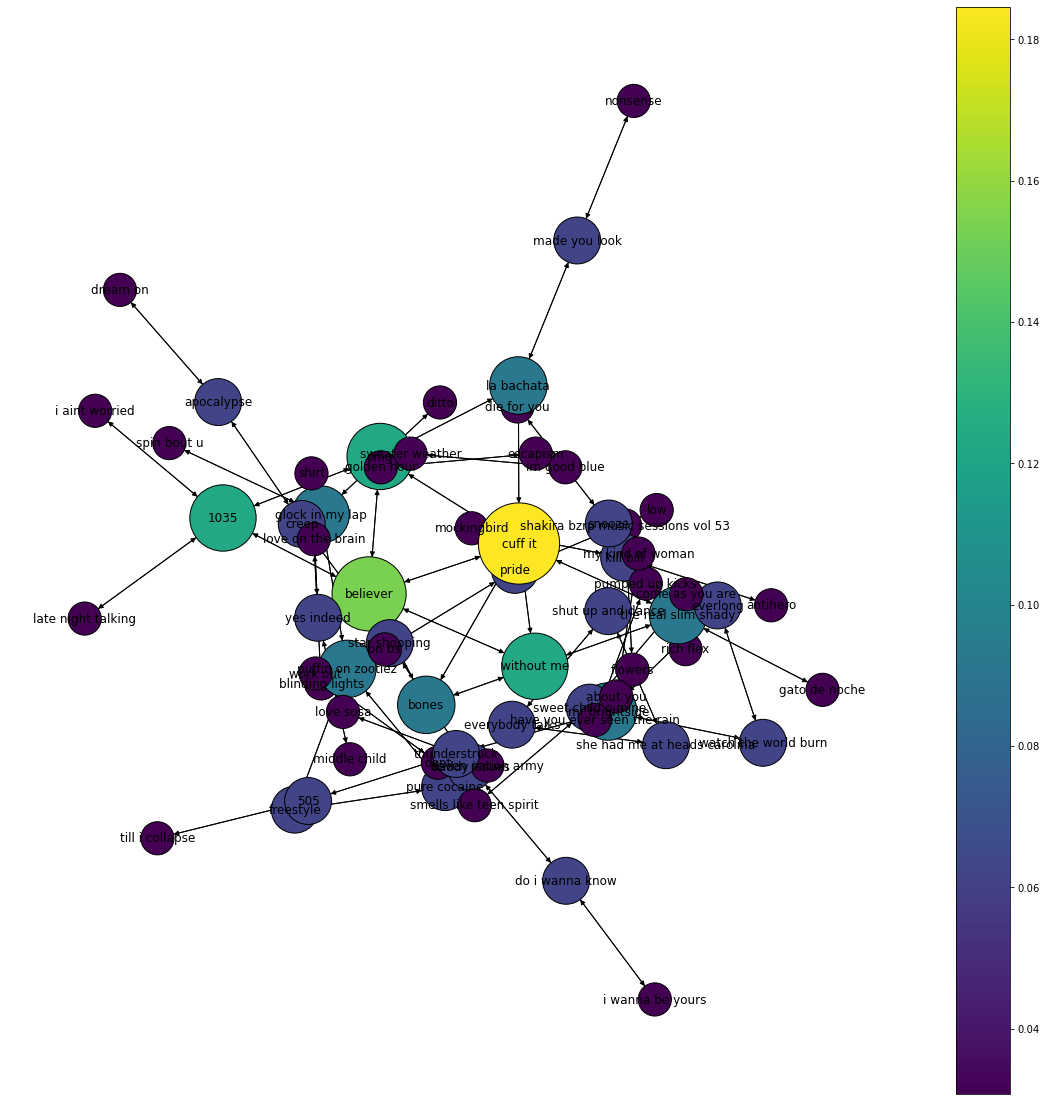

In [27]:
import networkx as nx
from itertools import combinations
import matplotlib.colors as mcolors
import matplotlib.cm as cm
G = nx.DiGraph()
value_column=cosine_similarity.iloc[0,0:120]
value_column=np.array(value_column.values.tolist())
value_row=cosine_similarity.iloc[0:120,0]
value_row=np.array(value_row.values.tolist())
sn=ogmerged['title'][0:120].tolist()
similarity_value=cosine_similarity.iloc[0:120,0:120]
similarity_value = np.array(cosine_similarity.iloc[0:120,0:120])

c=[]

for i in range(len(sn)):
    for j in range(len(sn)):        
        if i-j==0:
            continue
        elif similarity_value[i,j] > 0.9: 
            G.add_edge(sn[int(i)],sn[int(j)])

deg_cen = nx.degree_centrality(G)
cent = np.fromiter(deg_cen.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)



        
degrees = dict(G.degree())
node_size = [degrees[node] * 550 for node in G.nodes()]
pos = nx.kamada_kawai_layout(G)
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(G, pos=pos,with_labels = True, node_color = sizes, node_size=node_size,node_shape='o', edgecolors='k')
plt.colorbar(scalarmappaple)

In [28]:
#check edges for a certain point
c2=cosine_similarity.iloc[0:120,0:120]
c2[c2['cuff it'] > 0.9]

title                 flowers  kill bill  sure thing  romantic homicide  \
title                                                                     
omg                  0.856789   0.406711    0.263425          -0.405859   
cuff it              0.889518   0.602468    0.523375          -0.248626   
la bachata           0.802542   0.293284    0.344745          -0.364974   
the real slim shady  0.740914   0.503617    0.452899          -0.410124   
without me           0.788334   0.548418    0.367149          -0.393044   
bones                0.834099   0.653551    0.357536          -0.394953   
believer             0.827532   0.490262    0.217175          -0.442921   

title                rich flex  antihero    snooze       low  here with me  \
title                                                                        
omg                   0.032772  0.449375  0.095509  0.209005     -0.232600   
cuff it               0.155754  0.672191  0.200678  0.352499     -0.100797   
la bachata            0.061728  0.421582  0.057387  0.165885     -0.192490   
the real slim shady   0.023449  0.591933  0.053799  0.283644     -0.264215   
without me            0.057255  0.596151  0.148157  0.373507     -0.196609   
bones                 0.014678  0.621305  0.152580  0.322454     -0.217799   
believer              0.083145  0.534403  0.149587  0.289803     -0.307421   

title                     omg  ...  pumped up kicks  stressed out  \
title                          ...                                  
omg                  1.000000  ...         0.644763      0.597868   
cuff it              0.930926  ...         0.472617      0.404294   
la bachata           0.948864  ...         0.753454      0.607151   
the real slim shady  0.857121  ...         0.464735      0.347514   
without me           0.871707  ...         0.365036      0.387499   
bones                0.889767  ...         0.308607      0.321175   
believer             0.965370  ...         0.502447      0.524783   

title                bad moon rising  landslide  watch the world burn  \
title                                                                   
omg                         0.378847  -0.558226             -0.295567   
cuff it                     0.109202  -0.427536             -0.559251   
la bachata                  0.403615  -0.336739             -0.440502   
the real slim shady         0.031771  -0.467627             -0.711845   
without me                  0.017734  -0.590762             -0.582684   
bones                       0.023683  -0.728335             -0.421447   
believer                    0.312494  -0.608628             -0.333612   

title                about you  chamber of reflection  for the first time  \
title                                                                       
omg                  -0.342962              -0.322222           -0.316571   
cuff it              -0.315647              -0.269976           -0.049785   
la bachata           -0.405550              -0.138463           -0.130404   
the real slim shady  -0.434811              -0.424243           -0.054362   
without me           -0.447223              -0.486197           -0.211908   
bones                -0.263813              -0.562362           -0.271807   
believer             -0.332128              -0.430172           -0.356438   

title                my kind of woman  wake me up  
title                                              
omg                         -0.231383    0.535325  
cuff it                     -0.158429    0.341832  
la bachata                  -0.307360    0.443998  
the real slim shady         -0.222408    0.169174  
without me                  -0.251312    0.189011  
bones                       -0.076716    0.351515  
believer                    -0.194875    0.495630  

[7 rows x 120 columns]

### More analysis

In [29]:
#check the count of the edges in G
print(len(G.edges()))
print(len(G.nodes()))

116
66


In [30]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
#print(bet_cen)
#print(deg_cen)
#print(clos_cen)

#sort the value in the variables above 
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3]

[('cuff it', 0.010817307692307694),
 ('1035', 0.010096153846153847),
 ('la bachata', 0.009615384615384616)]

In [31]:
#edges connected with a specified node
edges = G.edges('cuff it')
print(edges)

[('cuff it', 'omg'), ('cuff it', 'la bachata'), ('cuff it', 'the real slim shady'), ('cuff it', 'without me'), ('cuff it', 'bones'), ('cuff it', 'believer')]


In [32]:
#show the counts of edge of all songs
degrees

{'flowers': 2,
 'shakira bzrp music sessions vol 53': 2,
 'kill bill': 4,
 'antihero': 2,
 'mockingbird': 2,
 'rich flex': 2,
 'snooze': 4,
 'die for you': 2,
 'low': 2,
 'pride': 4,
 'omg': 8,
 'cuff it': 12,
 'la bachata': 6,
 '1035': 8,
 'believer': 10,
 'im good blue': 2,
 'sweater weather': 2,
 'escapism': 2,
 'golden hour': 2,
 'nonsense': 2,
 'made you look': 4,
 'the real slim shady': 6,
 'without me': 8,
 'bones': 6,
 'i aint worried': 2,
 'ditto': 2,
 'glock in my lap': 6,
 'apocalypse': 4,
 'creep': 4,
 'dream on': 2,
 'late night talking': 2,
 'shirt': 2,
 'yes indeed': 4,
 'love on the brain': 2,
 'blinding lights': 2,
 'spin bout u': 2,
 'puffin on zootiez': 6,
 'freestyle': 4,
 'pure cocaine': 4,
 'middle child': 2,
 'star shopping': 4,
 'daddy issues': 4,
 'work out': 2,
 'dont': 2,
 'on bs': 2,
 'love sosa': 2,
 'seven nation army': 2,
 'gato de noche': 2,
 'till i collapse': 2,
 '505': 4,
 'thunderstruck': 4,
 'i wanna be yours': 2,
 'do i wanna know': 4,
 'everlong':

### Logistics regression

In [33]:
import statsmodels.api as sm
import numpy as np

# Define binary outcome variable based on median popularity score
median_popularity = np.median(normalized_df['popularity'])
normalized_df['popular'] = np.where(normalized_df['popularity'] >= median_popularity, 1, 0)

# Define X and y variables
X = normalized_df[['artist_popularity','danceability', 'energy', 'valence', 'tempo', 'loudness','vader_compound']]
y = normalized_df['popular']

# Fit logistic regression model
logit_model = sm.Logit(y, sm.add_constant(X)).fit()

# Print model summary
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.586345
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                  332
Model:                          Logit   Df Residuals:                      324
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.1541
Time:                        21:19:11   Log-Likelihood:                -194.67
converged:                       True   LL-Null:                       -230.12
Covariance Type:            nonrobust   LLR p-value:                 9.697e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0268      0.123      0.218      0.828      -0.214       0.268
artist_p

### Linear Regression 
y= count of edges, X= artist_popularity ,danceability(significant variable from logistics regression)

In [34]:
#Explore if there is significant relationship between counts of edge and danceability+artist_popularity(the two significant variables from logistics regression)

nl=['flowers', 'shakira bzrp music sessions vol 53', 'kill bill', 'antihero', 'mockingbird', 'rich flex', 'snooze', 'die for you', 'low', 'pride', 'omg', 'cuff it', 'la bachata', '1035', 'believer', 'im good blue', 'sweater weather', 'escapism', 'golden hour', 'nonsense', 'made you look', 'the real slim shady', 'without me', 'bones', 'i aint worried', 'ditto', 'glock in my lap', 'apocalypse', 'creep', 'dream on', 'late night talking', 'shirt', 'yes indeed', 'love on the brain', 'blinding lights', 'spin bout u', 'puffin on zootiez', 'freestyle', 'pure cocaine', 'middle child', 'star shopping', 'daddy issues', 'work out', 'dont', 'on bs', 'love sosa', 'seven nation army', 'gato de noche', 'till i collapse', '505', 'thunderstruck', 'i wanna be yours', 'do i wanna know', 'everlong', 'mr brightside', 'watch the world burn', 'smells like teen spirit', 'sweet child o mine', 'everybody talks', 'she had me at heads carolina', 'shut up and dance', 'come as you are', 'have you ever seen the rain', 'pumped up kicks', 'about you', 'my kind of woman']

selected_song = ogmerged.loc[ogmerged['title'].isin(nl)]
song_w_edge = pd.DataFrame(list(degrees.items()), columns=['title', 'edge_count'])
song_w_edge['edge_count'] =song_w_edge['edge_count']/2
song_w_edge
merged_w_edge = pd.merge(ogmerged, song_w_edge, on='title', how='outer')
merged_w_edge
merged_w_edge = merged_w_edge.loc[merged_w_edge['title'].isin(nl)]
merged_w_edge

lry=merged_w_edge['edge_count']
lrx=merged_w_edge[['artist_popularity','danceability']]
lry


0      1.0
1      2.0
4      1.0
5      1.0
6      2.0
      ... 
107    2.0
110    1.0
114    2.0
115    1.0
118    1.0
Name: edge_count, Length: 66, dtype: float64

In [35]:
#linear regression model
import statsmodels.api as sm
lrx= sm.add_constant(lrx)
model = sm.OLS(lry, lrx).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             edge_count   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.769
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.179
Time:                        21:19:11   Log-Likelihood:                -95.676
No. Observations:                  66   AIC:                             197.4
Df Residuals:                      63   BIC:                             203.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5330      1.54